<a href="https://colab.research.google.com/github/WNTBq/colab_public/blob/main/neural_network_on_iris_data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuronale Netzwerke - Basic-Example

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib.pylab as plt
import numpy as np

In [3]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [4]:
import sklearn
print(sklearn.__version__)

1.6.1


In [5]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [6]:
import keras
print(keras.__version__)

3.8.0


In [7]:
import pandas as pd
print(pd.__version__)

2.2.2


## Ein künstliche Neuron in Python "from Scratch" mit 2 eingaben + 1 bias



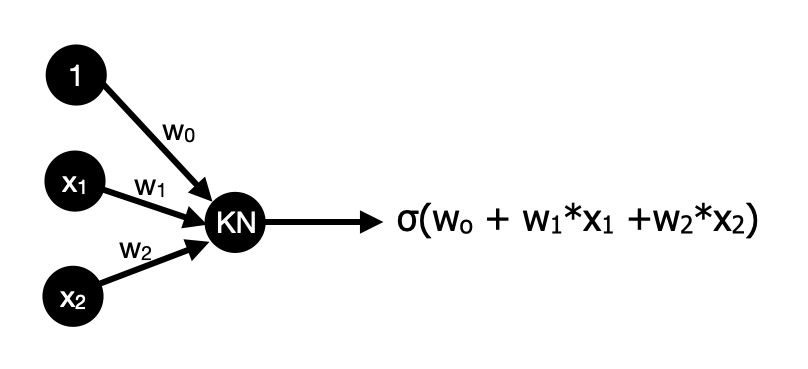

In [ ]:
#Künstliches Neuron
#=>
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1,x2):
    sum = w0 +w1*x1 +w2*x2
    return sum



In [ ]:
neuron_no_activation(5.1, 3.5)

### Activation Functions

- Die Funktion `centerAxis` zeichnet ein Koordinatenkreuz

In [ ]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#centerAxis()

#### Aktivierungs Funktion **"Step Function"**:  
- abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [ ]:
# step-function
#=>

In [ ]:
#plot
#=>

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [ ]:
#sigmoid


In [ ]:
#plot sigmoid
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

In [ ]:
#tanh plot
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [ ]:
#relu
#=>

In [ ]:
#print relu
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

## Ein künstliches Neuron (from scratch)

In [ ]:
# https://docs.python.org/3/library/math.html
# Künstliches Neuron


In [ ]:
neuron(5.1, 3.5)

## Iris mit Neuronalen Netzwerken

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
iris.data[0]

In [ ]:
# Scattermatrix

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolors='black', figsize=(10, 10))

In [ ]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Unser erste Neuronales Netz mit Keras
- die Inputschicht nimmt die 4 __Features__ als Eingabe
- diese werden jeweils unverändert an alle drei Neuronen der _Dense-Schicht_ weitergeleitet
- __Faustregel:__ Jedes Neuron kann eine Linie zu einer Decision-Boundary beitragen => wir können eine Art Dreieck abgrenzen
- __Dense__ oder "Fully Connected" drück aus, daß alle Neuronen voneinander unabhänging sind und alle die Eingaben der Vorherigen Schicht als Input bekommen und Ihre Ausgaben wiederum an alle Neuronen der nächsten Schicht weiterleiten
- Alle Layer die nicht zur Eingabe- oder Ausgabe-Schicht gehören werden als Hidden-Layer bezeichnet
- wir entwickeln ein "Feed Forward Netzwerk" in dem es _keine Schleifen_ nur einen direkten Weg von der _Eingabe_ zur _Ausgabe_ gibt. D.h die _Eingaben_ werden von der Eingabeschicht weiter Richtung Ausgabeschicht durchgeleitet


In [ ]:
#Input layer
#=>

In [ ]:
#dense layer
#=>

In [ ]:
#model
#=>

- Mit model.summary() lässt sich das Netzwerk Schichtweise zusammenfassen
- für die drei Neuronen kommen wir auf 15 Gewicht/Variablen welche optimiert werden sollen. Jeweils 4 Gewichte für die Verbindung zu den Eingaben und jeweils ein bias-Gewicht


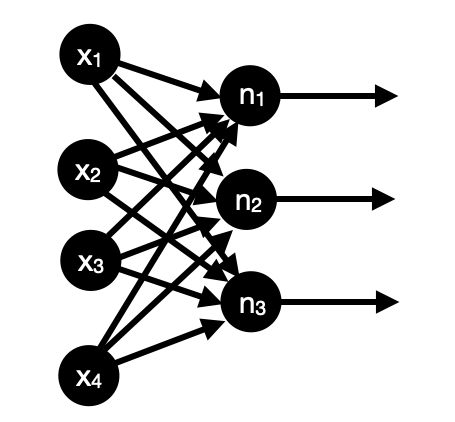

In [ ]:
#summary
model.summary()

- Solch ein Model muss compiliert werden
- wir können damit bereits Vorhersagen machen. Allerdings ist das Model noch untrainiert

In [ ]:
#compile model
#=>

Nun ist es bereits möglich Eingaben durch das NN zu leiten, das Modell ist aber noch untrainiert

In [ ]:
#=>


- Wir fügen noch eine Weiter Schicht als Ausgabe hinzu.
- Die Idee ist dabei das für jede Iris-Art ein Ausgabe-Neuron gibt.

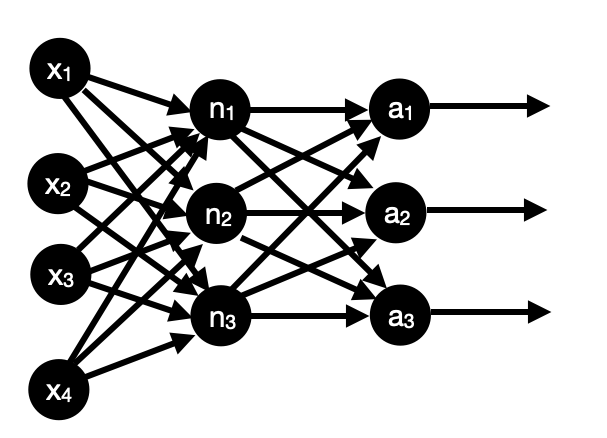

In [ ]:
# Schreibweise  1



In [ ]:
#summary
model.summary()

In [ ]:

# alternative Schreibweise
'''
model = tf.keras.Sequential()
inputs = Input(shape=(4, ))
model.add(inputs)
model.add(Dense(3))# Fully connected layer
model.add(Dense(3, activation='softmax'))
'''



In [ ]:
#summary
model.summary()

In [ ]:
#compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#=>
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

# Training

In [ ]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

Wir wollen unser Zielvariable binär codieren:  
0 => (1,0,0)   
1 => (0,1,0)  
2 => (0,0,1)
dazu verwenden wir die Funktion `to_categorical`


In [ ]:
y[100]

In [ ]:
#from keras.utils.np_utils import to_categorical # hier war ein Fehler im Ursprünglichen Script
from keras.utils import to_categorical

#to_categorical
#=>


In [ ]:
y[100] # nun [0., 0., 1.] statt "2"

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Data Training

In [ ]:

# model.fit
%time model.fit(X_train, y_train, epochs=100, validation_split=0.3) # 0.20000000298023224
#%time model.fit(X_train, y_train, epochs=500, validation_split=0.3) # 0.9666666388511658
#%time model.fit(X_train, y_train, epochs=1000, validation_split=0.3) # 0.9666666388511658

# Bewertung

In [ ]:
# einen Datenpunkt testen
#=>



In [ ]:
#prüfen:
#=>


In [ ]:
# evaluierung trainingsdaten


In [ ]:
# evaluierung testdaten
